In [95]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [63]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


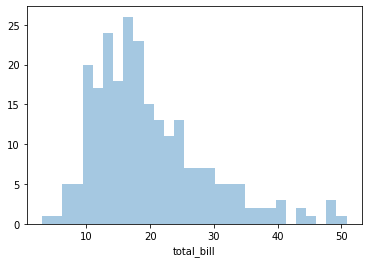

In [9]:
sns.distplot(tips['total_bill'], kde = False, bins=30 ) #distribution of a particular column

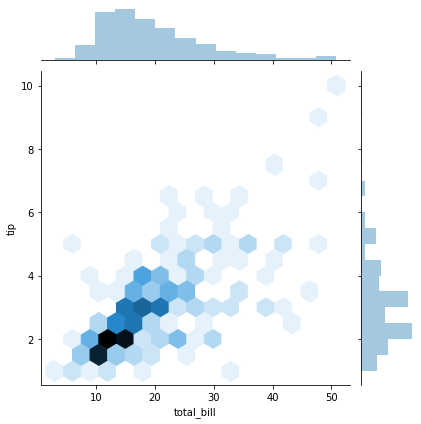

In [14]:
sns.jointplot(x='total_bill' , y ='tip', data=tips, kind='hex') #kind can be reg, hex or default scatter

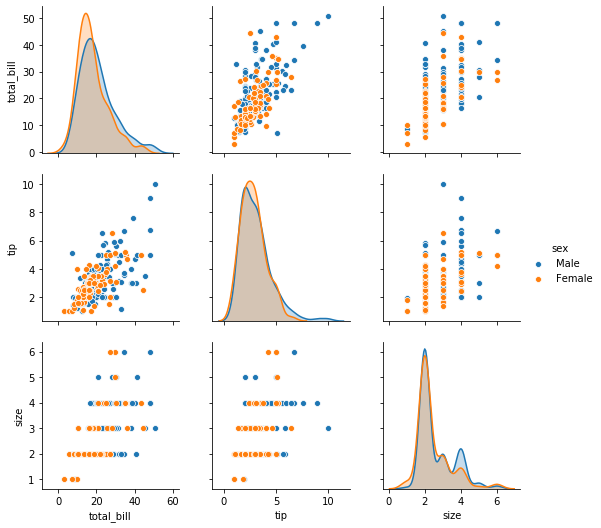

In [18]:
sns.pairplot(tips, hue = 'sex') # hue is for categorical columns

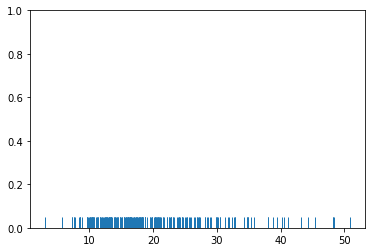

In [19]:
sns.rugplot(tips['total_bill']) #dense area shows the distribution cluster

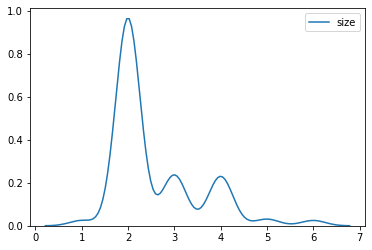

In [24]:
#kde - kernel density estimation
sns.kdeplot(tips['size'])

In [27]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


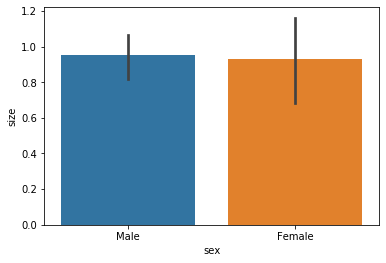

In [37]:
# categorical plots #y axis numerical column. Gives you aggregate/mean value for male/femal
sns.barplot(x='sex',y='size',data=tips, estimator = np.std) 


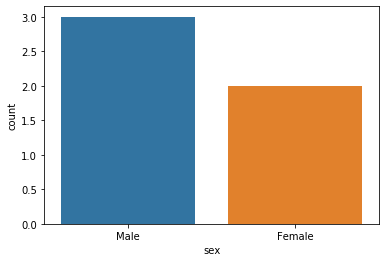

In [39]:
sns.countplot(x='sex', data=tips[0:5]) # simple caluclation similarto histoggram

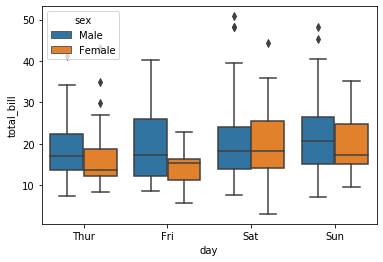

In [42]:
sns.boxplot(x='day', y='total_bill', data=tips, hue = "sex")

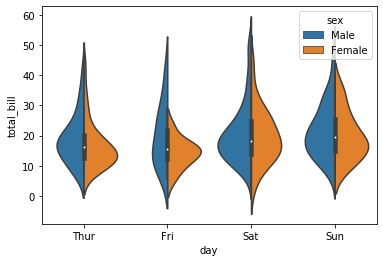

In [45]:
sns.violinplot(x='day', y='total_bill', data=tips, hue="sex", split=True)

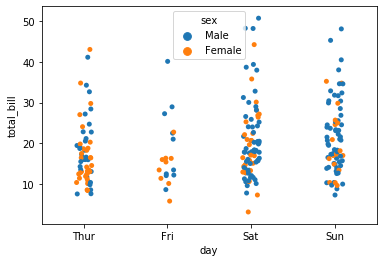

In [52]:
sns.stripplot(x='day', y="total_bill", data = tips, hue = "sex")

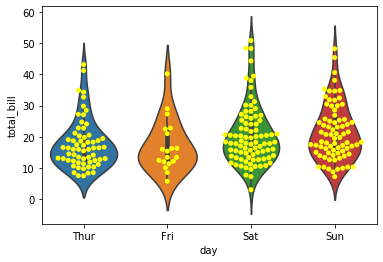

In [56]:
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill',data=tips, color="yellow") 
#combination of stripplot and violinplot 
# and not suitable for large data sets

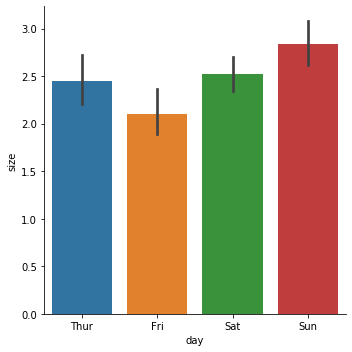

In [62]:
sns.factorplot(x='day', y='size', data=tips, kind="bar")

In [65]:
# matrix plots
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [66]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


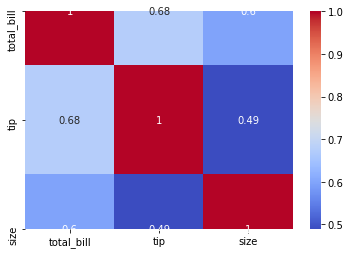

In [73]:
# heat map data should be in matrix form ie row name and column should be same with some correlation
# or any nXn matrix
tc = tips.corr()
sns.heatmap(tc, annot = True, cmap="coolwarm")

In [75]:
fp = flights.pivot_table(index="month", columns = "year", values = "passengers")
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


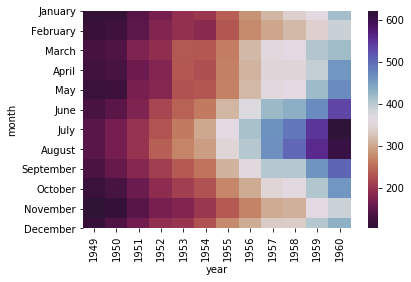

In [81]:
sns.heatmap(fp,cmap="twilight_shifted_r", linecolor="white")

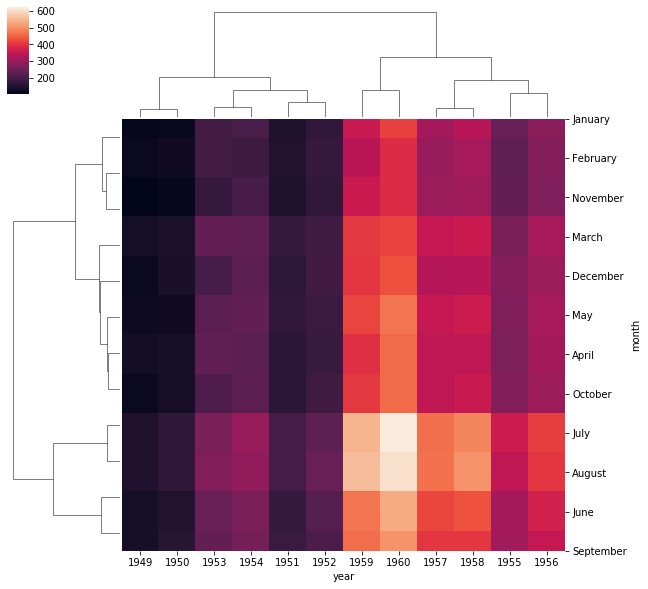

In [86]:
sns.clustermap(fp) #clusters similar valued data in heirarcial manner eg check values for Feb and Nov for yr 1960

In [87]:
iris= sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [88]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

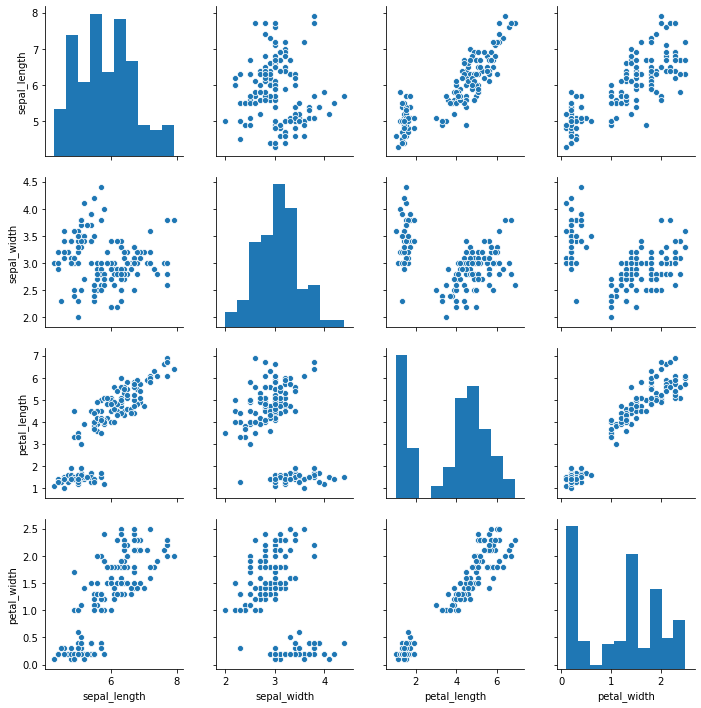

In [89]:
sns.pairplot(iris)

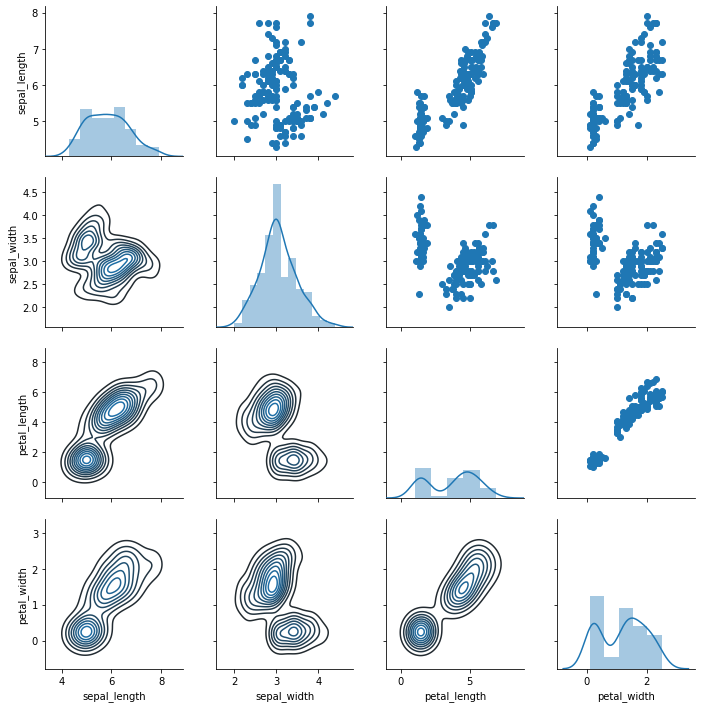

In [99]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

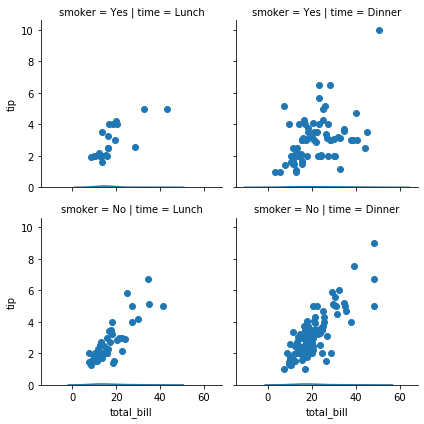

In [102]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.distplot, 'total_bill')
g.map(plt.scatter,"total_bill", "tip")

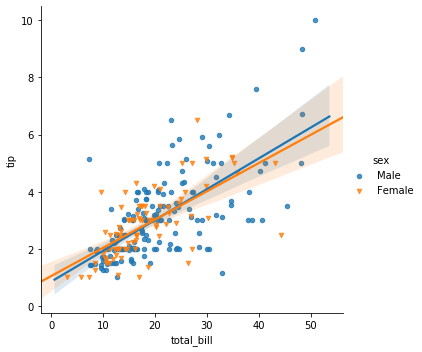

In [109]:
#regression plots
sns.lmplot(x='total_bill', y = 'tip', data = tips, hue= "sex", 
           markers=['o','v'], scatter_kws ={'s':20}) #kws to change size

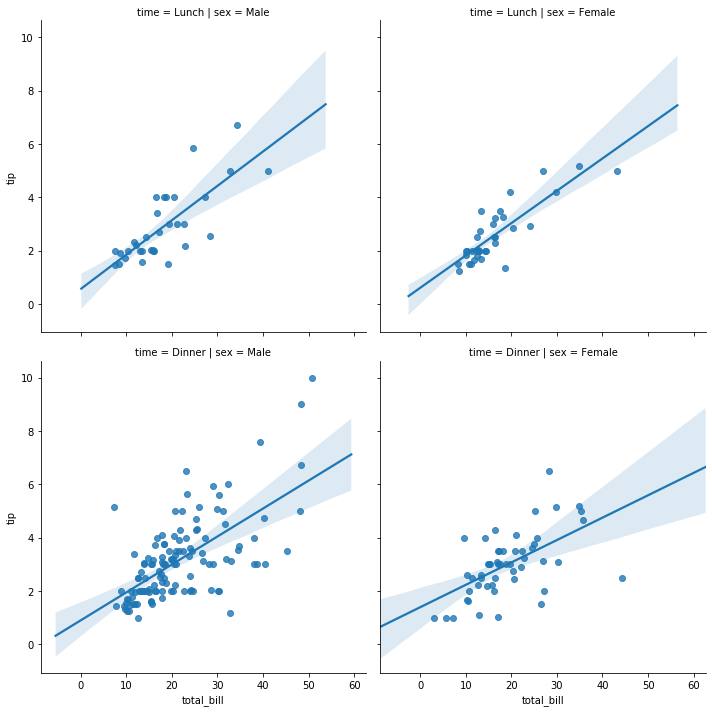

In [111]:
sns.lmplot(x='total_bill', y = 'tip', data = tips, col= "sex", row = "time")

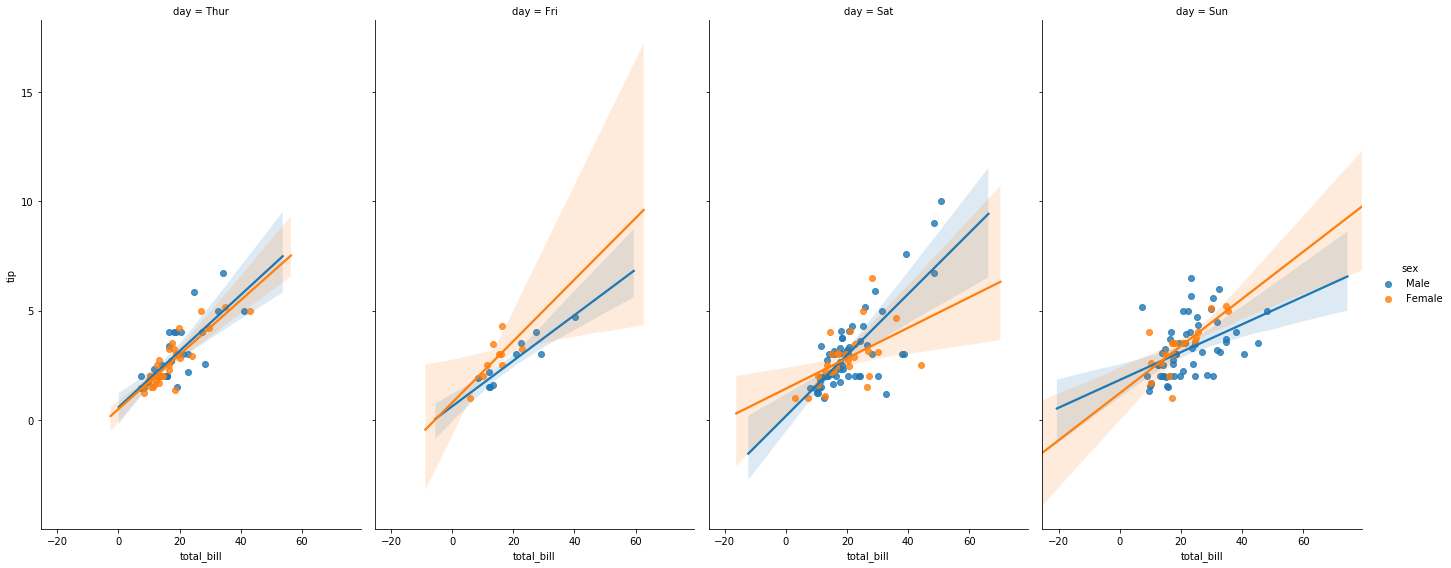

In [114]:
sns.lmplot(x='total_bill', y = 'tip', data = tips, hue= "sex", col="day",
          aspect = 0.6, height = 8)

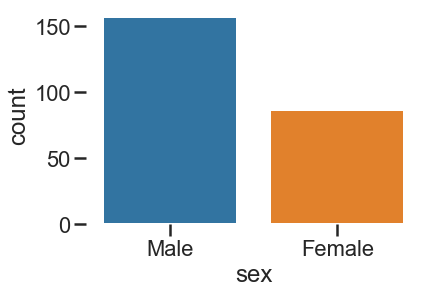

In [125]:
#controlling style and font sizes
# plt.figure(figsize=(12,3)) #this overides sns fig size as seaborn inherits from matplolib
# sns.set_style("ticks")
sns.set_context('poster')
sns.countplot(x="sex", data = tips)
sns.despine(left = True, bottom = True) #removes the edges


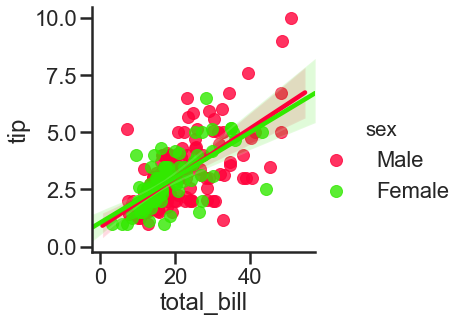

In [130]:
sns.lmplot(x='total_bill', y ='tip', data=tips, hue= 'sex', palette='prism_r')